In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import sympy as sp

## Generate Sample Data

Let's generate a dataset with a simple linear relationship (with some noise).

In [2]:
X = np.linspace(0, 10, 500)

m = 2 # slope
b = 3 # intercept

# add "noise" term (randomness in data)
errors = np.random.normal(0, 3, X.shape) # mean, var, number of points

Y = m*X + b + errors

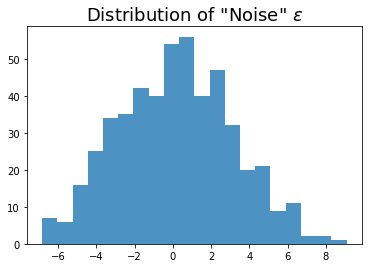

In [3]:
# distribution of our errors (should be normal)
plt.hist(errors, bins=20, alpha=0.8)

plt.title('Distribution of "Noise" $\epsilon$', fontsize=18)

plt.show()

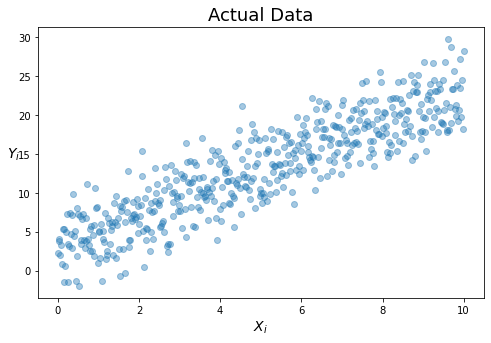

In [4]:
# look at our data


plt.figure(figsize=(8, 5))
plt.scatter(X, Y, alpha=0.4)

plt.title('Actual Data', fontsize=18)

label_kwargs = dict(fontsize=14, rotation=0)
plt.ylabel('$Y_i$', **label_kwargs)
plt.xlabel('$X_i$', **label_kwargs)

plt.show()

# Build Simple Linear Regression Model

## Model Selection

We know that the data follows a linear relationship. So let's use a simple **`linear regression model`**.
$$
\begin{align}
    \hat{Y_i} = \beta_1 x_i + \beta_0
\end{align}
$$
**Parameters**
* $\hat{Y_i}$ is predicted value.
* $x_i$ is input value.
* $\beta_1$ is the model's coefficient (trying to estimate $m$).
* $\beta_0$ is the bias (trying to estimate $b$).

## Cost Function

We need a way to improve our estimated parameters: a cost function that tells us how far off our prediction is from the actual data. The standard cost function for linear regressions is the `least squared error`.


Sum of squared error:
$$
\begin{align}
    \text{SSE} &= \sum_{i=1}^{n}(y_i - \hat{y_i})^2
    \\
    &=\sum_{i=1}^{n}(y_i - \beta_1 x_i - \beta_0)^2
\end{align}
$$

We minimize SE by taking partial derivatives with respect to our free parameters setting derivatives to $0$.

### Minimize cost function with respect to bias term $\beta_0$

$$
\begin{align}
    \frac{\partial \text{SSE}}{\partial \beta_0}
    &= \frac{\partial}{\partial \beta_0} \sum_{i=1}^{n}(y_i - \beta_1 x_i - \beta_0)^2 \\
    0 &= -2\sum_{i=1}^{n}(y_i - \beta_1 x_i - \beta_0) \\
    &= \sum_{i=1}^{n}(y_i - \beta_1 x_i - \beta_0) \\
    &= \sum_{i=1}^{n}(y_i) - \beta_1 \sum_{i=1}^{n}(x_i) - \sum_{i=1}^{n}(\beta_0) \\
    &= \sum_{i=1}^{n}(y_i) - \beta_1 \sum_{i=1}^{n}(x_i) - n(\beta_0) \\
    n(\beta_0) & = \sum_{i=1}^{n}(y_i) - \beta_1 \sum_{i=1}^{n}(x_i) \\
    \beta_0 & = \frac{\sum_{i=1}^{n}(y_i)}{n} - \beta_1 \frac{\sum_{i=1}^{n}(x_i)}{n} \\
    \beta_0 & = \bar{y} - \beta_1\bar{x}
\end{align}
$$

Where:
* $\bar{y}$ is the average of our actual data values.
* $\bar{x}$ os the average of our input values.


### Minimize cost function with respect to coefficient $\beta_1$
Then $\beta_1$:
$$
\begin{align}
    \frac{\partial \text{SSE}}{\partial \beta_1}
    &= \frac{\partial}{\partial \beta_1} \sum_{i=1}^{n}(y_i - \beta_1 x_i - \beta_0)^2 \\
    0 &= \sum_{i=1}^{n} -2x_i (y_i - \beta_1 x_i - \beta_0) \\
    &= \sum_{i=1}^{n} x_i(y_i - \beta_1 x_i - \beta_0) \\
    &= \sum_{i=1}^{n} (y_ix_i - \beta_1 x_i^2 - \beta_0x_i) \\
    &= \sum_{i=1}^{n} (y_ix_i - \beta_1 x_i^2 - (\bar{y} - \beta_1\bar{x})x_i) \\
    &= \sum_{i=1}^{n} (y_ix_i - \bar{y}x_i - \beta_1 x_i^2 + \beta_1\bar{x}x_i ) \\
    &= \sum_{i=1}^{n} (y_ix_i - \bar{y}x_i) + \sum_{i=1}^{n}(-\beta_1 x_i^2 + \beta_1\bar{x}x_i) \\
    &= \sum_{i=1}^{n} (y_ix_i - \bar{y}x_i) - \beta_1\sum_{i=1}^{n}(x_i^2 - \bar{x}x_i)
    \\
    \beta_1 & = \frac{\sum_{i=1}^{n} x_i(y_i - \bar{y}) - 0}{\sum_{i=1}^{n}x_i(x_i - \bar{x}) - 0}
    \\
    & = \frac{\sum_{i=1}^{n} x_i(y_i - \bar{y}) - \sum_{i=1}^{n} \bar{x}(y_i - \bar{y})}{\sum_{i=1}^{n}x_i(x_i - \bar{x}) - \sum_{i=1}^{n} \bar{x}(y_i - \bar{y})} \tag{*} \\
    & = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})(x_i - \bar{x})} \\
    & = \frac{\rho_{x, y}}{\sigma_{x}} \\
\end{align}
$$


---

#### Footnote

Zero term derivation:

$$
\tag{*}  \sum_{i=1}^{n} \bar{x}(y_i - \bar{y}) = \bar{x} \left(\sum_{i=1}^{n} y_i - \sum_{i=1}^{n} \bar{y}\right) = \bar{x} (n\bar{y} - n\bar{y}) = 0
$$

### Reference
Derivation from [Medium article](https://towardsdatascience.com/linear-regression-derivation-d362ea3884c2) by Ridley Leisy.

In [5]:
def mean(x):
    '''
    Returns mean of series x.
    
    Arguments
        x : Array of numbers
    '''
    
    return sum(x) / len(x)


def cov(x, y):
    '''
    Returns covariance between arrays x and y.
    
    Arguments
        x : Array of numbers
        y : Array of numbers
    '''
     
    x, y = np.array(x), np.array(y)
    
    return (x - mean(x))@(y - mean(y))


def var(x):
    '''
    Returns variance of y.
    
    Arguments
        y : Array of numbers
    '''
    
    return sum((np.array(x) - mean(x))**2)

In [6]:
β_1 = cov(X, Y) / cov(X, X)
β_0 = mean(Y) - β_1*mean(X)

In [7]:
y_hat_i, x_i = sp.symbols('\hat{y_i}, x_i')
sp.Eq(y_hat_i, round(β_1, 3) * x_i + round(β_0, 3))

Eq(\hat{y_i}, 2.0*x_i + 3.147)

In [8]:
Y_hat = β_1*X + β_0

Y_actual = m*X + b

In [9]:
def reg_analyze(Y_hat, Y):

    ϵ = Y - Y_hat # residuals
    SSE = (ϵ**2).sum() # sum of squares of errors

    s_reg = Y_hat - mean(Y)
    SSR = (s_reg**2).sum() # sum of squares of regression

    SST = cov(Y, Y) # sum of squares total

    r_sq = 1 - (SSE / SST) # r-squared ()
    
    return {
        'SSE' : SSE,
        'SSR' : SSR,
        'SST' : SST,
        'r_sq' : r_sq
    }

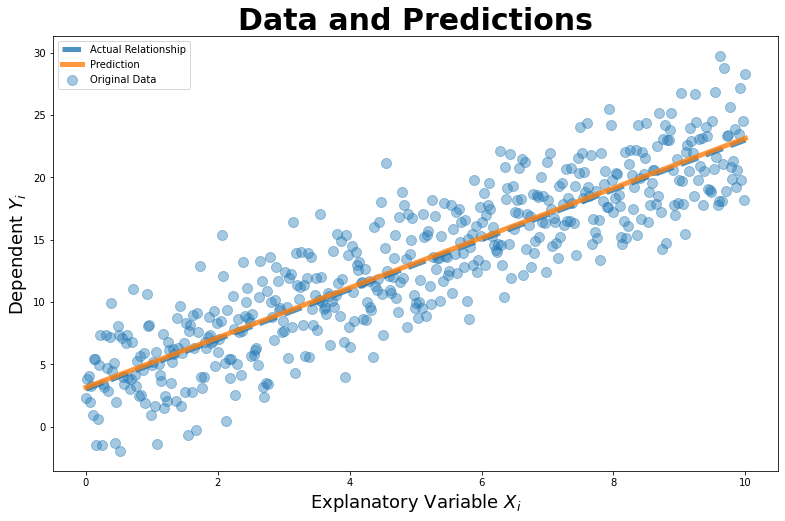

In [10]:
# plot our prediction with data

plt.figure(figsize=(13, 8))

plt.scatter(X, Y, alpha=0.4, s=100, label='Original Data') # OG data

plt.plot(X, Y_actual, lw=5, alpha=0.8, ls='--', label='Actual Relationship') # actual relationship

plt.plot(X, Y_hat, lw=5, alpha=0.8, label='Prediction') # prediction

plt.title('Data and Predictions', fontsize=30, fontweight='bold')

label_kwargs = dict(fontsize=18)
plt.ylabel('Dependent $Y_i$', **label_kwargs)
plt.xlabel('Explanatory Variable $X_i$', **label_kwargs)
plt.legend()

plt.show()

In [11]:
class LinearRegression(object):
    
    def __init__(self, X, Y):
        
        # initial params
        self.m = 0
        self.b = 0
        
    def estimate(self):
        
        cov(X, Y) / cov(X, X)
        